<a href="https://colab.research.google.com/github/kokorina-irina/ML/blob/master/KR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='DarkTurquoise'>**Курсовая работа по дисциплине**</font> <font color='Teal'>"**Технологии машинного обучения**"</font>
##<font color='Gold'>**Кокорина И.А. ИУ5-63Б**</font> ![alt text](https://www.libellules.ch/icone_meteo.png)


#<font color='DarkTurquoise'> В Москве май 2020 года стал самым дождливым за последние 200 лет</font>
После такой новости вопрос о выборе темы исследования в машинном обучении встал только за поиском подходящего набора данных. Используемый набор данных содержит ежедневные наблюдения за погодными условиями в нескольких городах России и используется с целью прогнозирования наличия осадков завтра (Yes_RainTomorrow).

<font color='DarkTurquoise'>Выбранный датасет содержит:</font>
*   Дата наблюдения
*   Город наблюдения
*   Минимальная и максимальная температура в градусах Цельсия
*   Количество осадков за день 
*   Количество часов наблюдения яркого солнечного света в день 
*   Направление и скорость ветра 
*   Влажность воздуха
*   Облачность 
*   Атмосферное давление 


<font color='DarkTurquoise'>Импорт необходимых библиотек:</font>

In [0]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sns.set(style="ticks")
# Модели
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<font color='DarkTurquoise'>Загрузка данных для исследования:</font>

In [0]:
data = pd.read_csv('/content/sample_data/weatherAUS.csv', sep=",")

#<font color='Teal'>Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.</font>
###Начнем с общего обзора набора данных 

In [0]:
data.head()

Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0  2019-12-01   Moscow     13.4  ...         No      0.0            No
1  2019-12-02   Moscow      7.4  ...         No      0.0            No
2  2019-12-03   Moscow     12.9  ...         No      0.0            No
3  2019-12-04   Moscow      9.2  ...         No      1.0            No
4  2019-12-05   Moscow     17.5  ...         No      0.2            No

[5 rows x 24 columns]

In [0]:
print("Количество строк:",data.shape[0])
print("Количество колонок:",data.shape[1])

Количество строк: 142191
Количество колонок: 24


In [0]:
# Список колонок с типами данных
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [0]:
# Проверка на пустые значения
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57093
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [0]:
data = data.dropna(axis = 0, how = 'any')
data = data.drop(['Date'], axis=1)

In [0]:
#Кодирование категориальных признаков
col = ['RainToday','RainTomorrow']
for c in col:
    temp = pd.get_dummies(data[c])
    data = data.join(temp,rsuffix=str('_'+c))
    data = data.drop(c, axis=1)
data.head()

Location  MinTemp  MaxTemp  ...  Yes  No_RainTomorrow  Yes_RainTomorrow
5939    Anapa     17.9     35.2  ...    0                1                 0
5940    Anapa     18.4     28.9  ...    0                1                 0
5942    Anapa     19.4     37.6  ...    0                1                 0
5943    Anapa     21.9     38.4  ...    0                1                 0
5944    Anapa     24.2     41.0  ...    0                1                 0

[5 rows x 25 columns]

In [0]:
# Список колонок с типами данных
data.dtypes

Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RISK_MM             float64
No                    uint8
Yes                   uint8
No_RainTomorrow       uint8
Yes_RainTomorrow      uint8
dtype: object

In [0]:
# Основные статистические характеристки набора данных
data.describe()

MinTemp       MaxTemp  ...  No_RainTomorrow  Yes_RainTomorrow
count  56419.000000  56419.000000  ...     56419.000000      56419.000000
mean      13.464932     24.219405  ...         0.779755          0.220245
std        6.416630      6.970578  ...         0.414415          0.414415
min       -6.700000      4.100000  ...         0.000000          0.000000
25%        8.600000     18.700000  ...         1.000000          0.000000
50%       13.200000     23.900000  ...         1.000000          0.000000
75%       18.400000     29.700000  ...         1.000000          0.000000
max       31.400000     48.100000  ...         1.000000          1.000000

[8 rows x 21 columns]

# С наличием такого набора данных никак нельзя обойти стороной вопрос 
#<font color='DarkTurquoise'>**"Куда ветер дует?"**</font>
#Отвечаем!

In [0]:
data["WindGustDir"].value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3790
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

<font color='DarkTurquoise'>Приходим к выводу, что всё-таки на восток!</font>


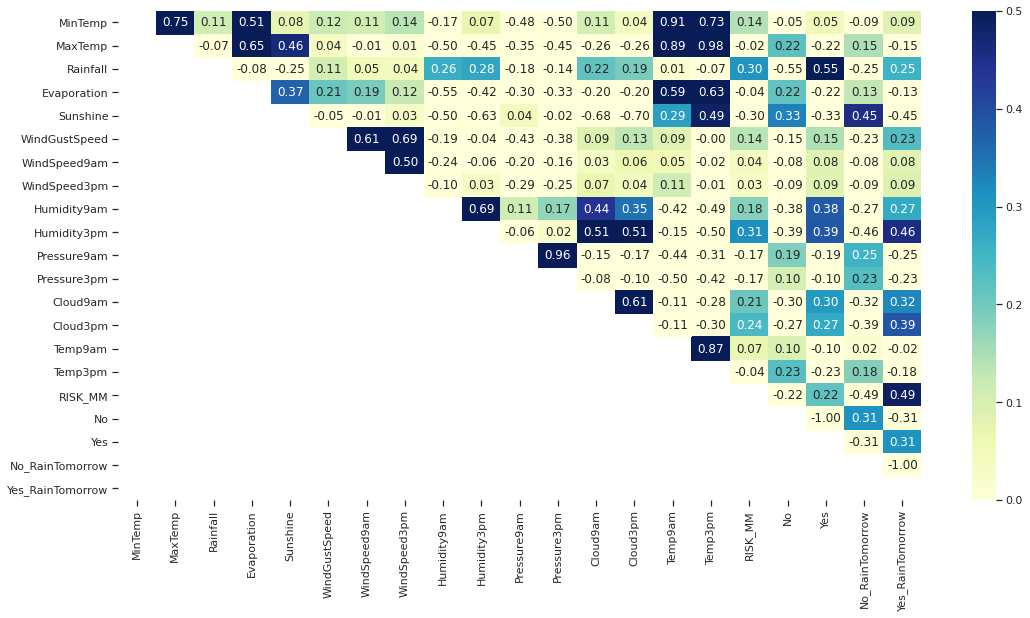

In [0]:
# Построим корреляционную матрицу
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(data.corr(),vmin=0, vmax=0.5, cmap='YlGnBu', annot=True, mask=mask, fmt='.2f')

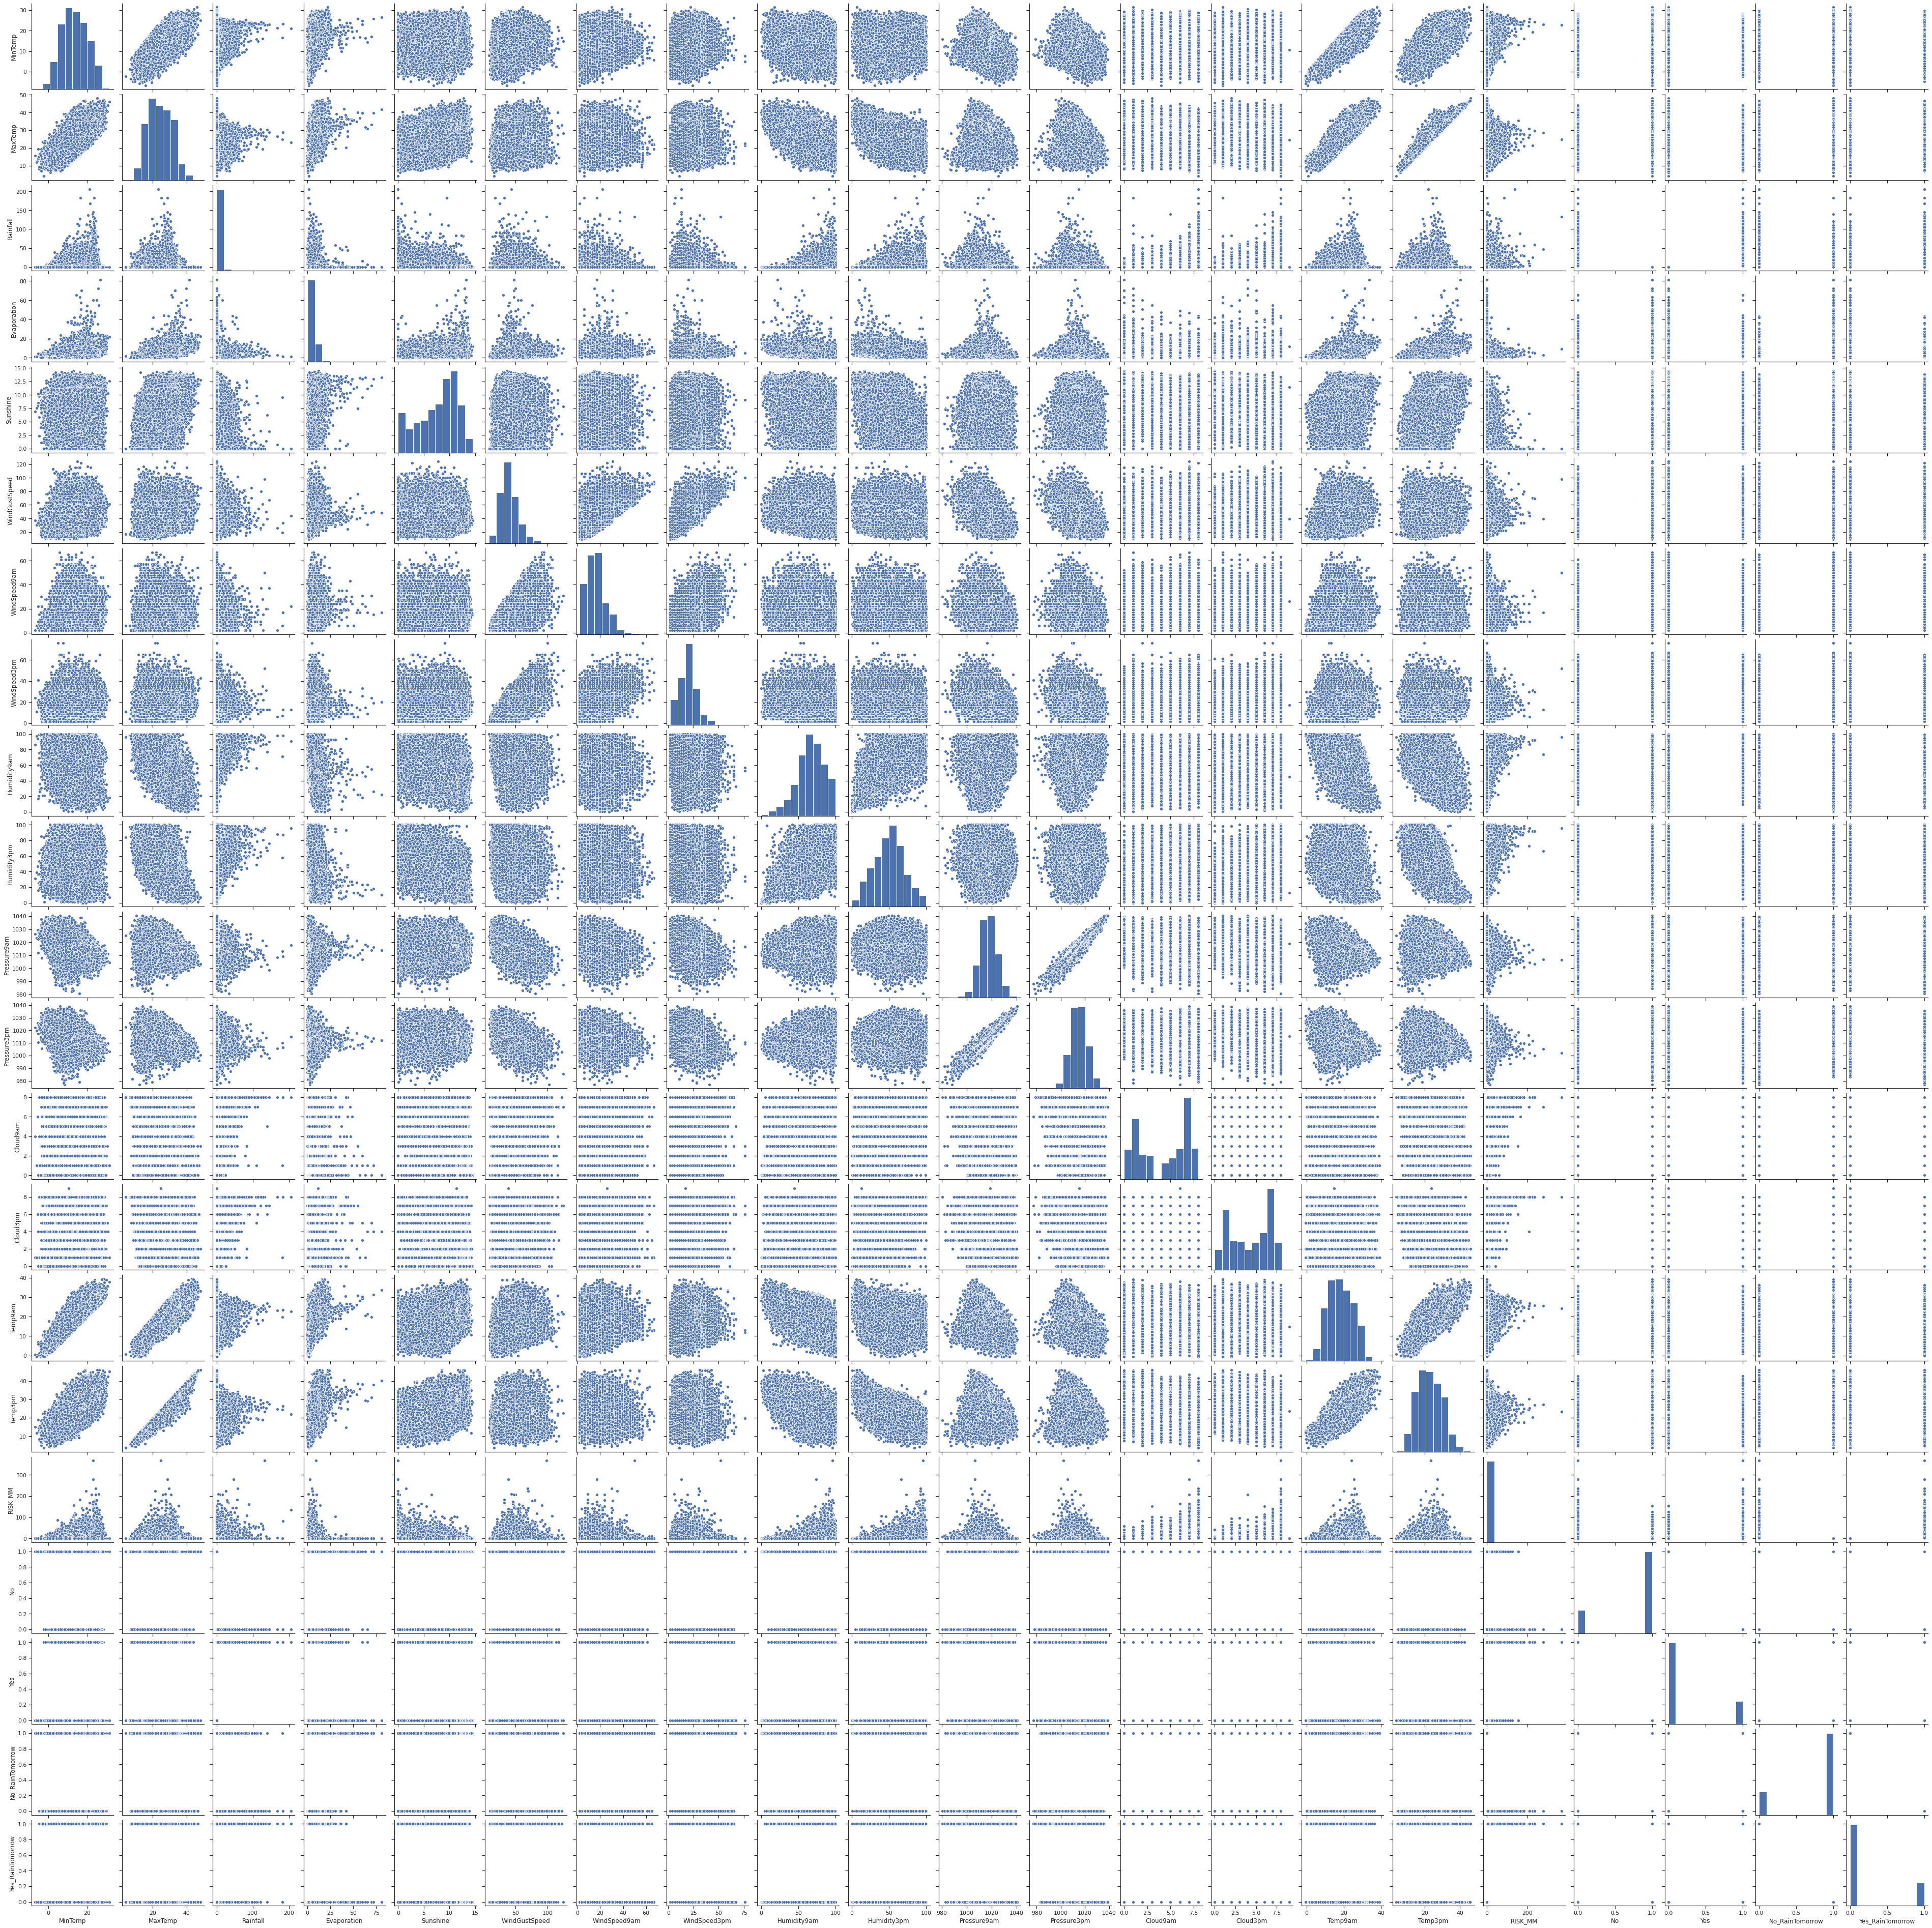

In [0]:
sns.pairplot(data)

In [0]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['Yes_RainTomorrow'].unique()

array([0, 1], dtype=uint8)

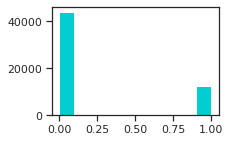

In [0]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(3,2)) 
plt.hist(data['Yes_RainTomorrow'], color='DarkTurquoise')
plt.show()

In [0]:
data['Yes_RainTomorrow'].value_counts()

0    43993
1    12426
Name: Yes_RainTomorrow, dtype: int64

In [0]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['Yes_RainTomorrow'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 77.98%, а класс 1 составляет 22.02%.


<font color='DarkTurquoise'>Дисбаланс классов присутствует, но является приемлемым</font>

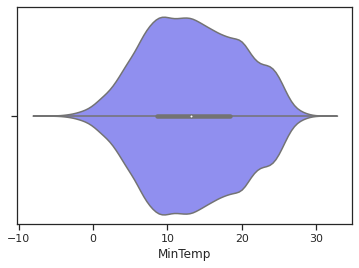

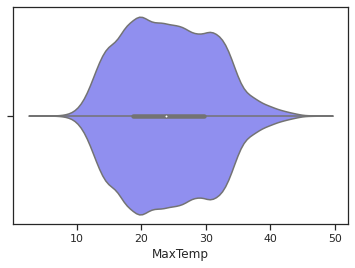

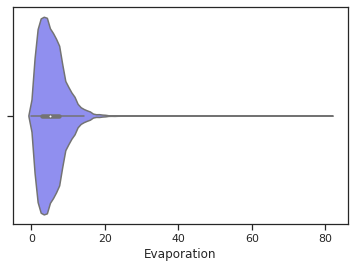

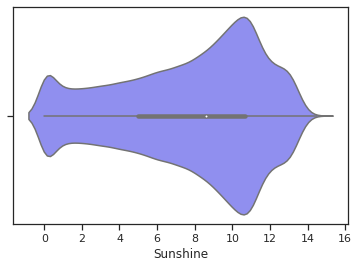

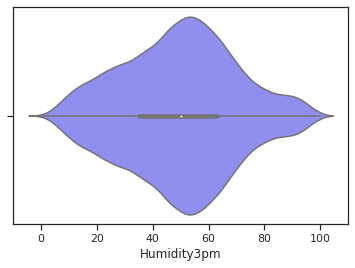

In [0]:
# Скрипичные диаграммы для числовых колонок
for col in ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm']:
    sns.violinplot(x=data[col], palette ='cool')
    plt.show()

#<font color='Teal'>Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.</font>

Для построения модели будем использовать все признаки, кроме показателей направления ветра и геопозиции. Поэтому исключим эти данные из набора.

In [0]:
data = data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)

In [0]:
data.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustSpeed       float64
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RISK_MM             float64
No                    uint8
Yes                   uint8
No_RainTomorrow       uint8
Yes_RainTomorrow      uint8
dtype: object

In [0]:
# Числовые колонки для масштабирования
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [0]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [0]:
data.head()

MinTemp  MaxTemp  ...  Temp3pm_scaled  RISK_MM_scaled
5939     17.9     35.2  ...        0.700472             0.0
5940     18.4     28.9  ...        0.549528             0.0
5942     19.4     37.6  ...        0.735849             0.0
5943     21.9     38.4  ...        0.752358             0.0
5944     24.2     41.0  ...        0.799528             0.0

[5 rows x 38 columns]

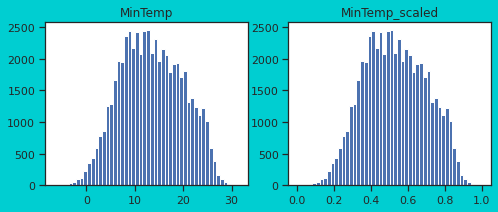

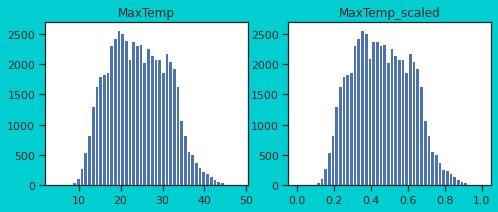

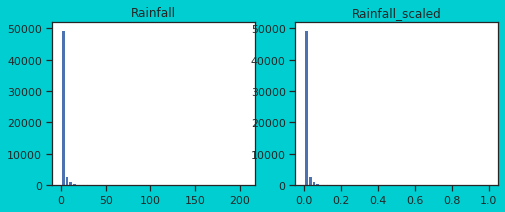

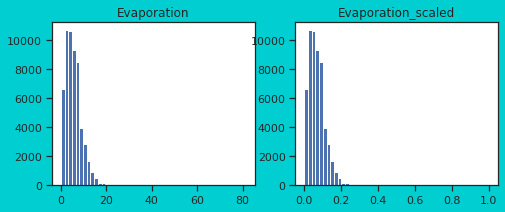

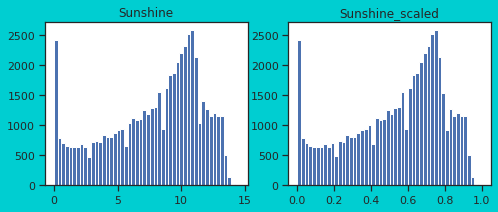

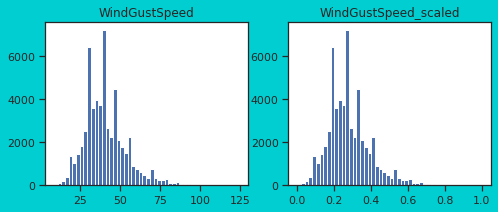

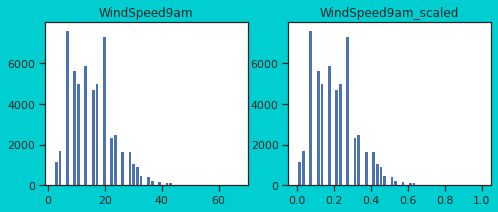

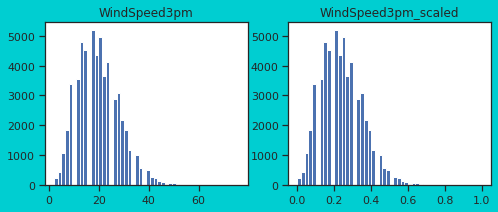

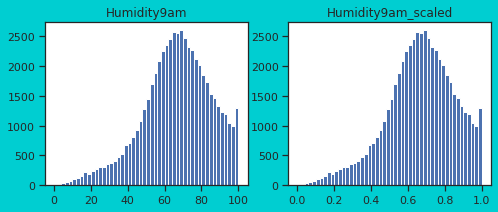

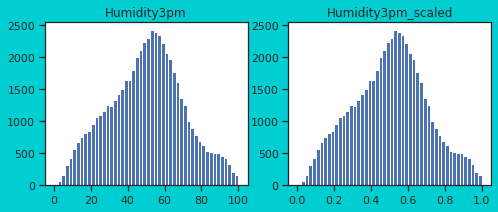

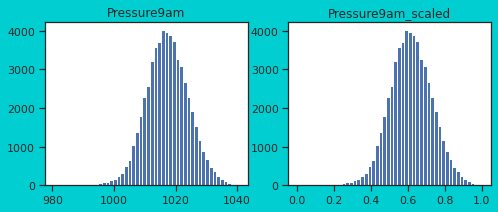

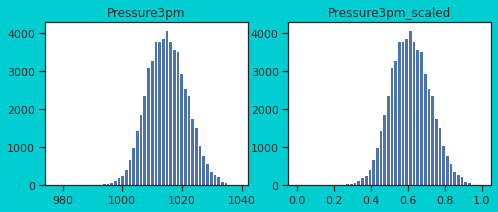

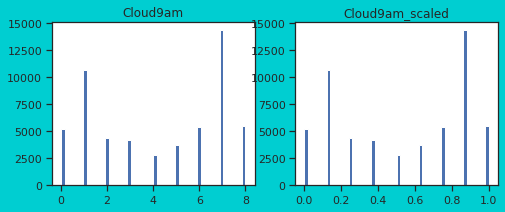

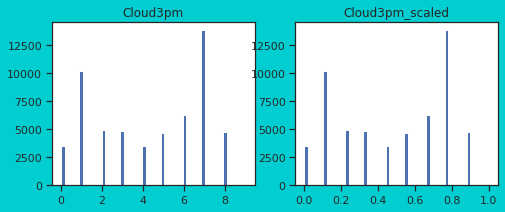

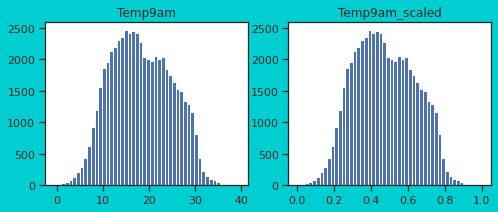

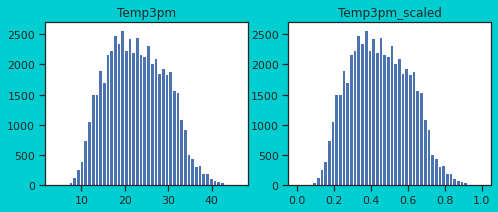

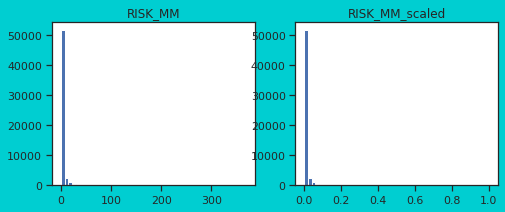

In [0]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'
    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    fig.set(facecolor = 'DarkTurquoise')
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

#<font color='Teal'>Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.</font>

In [0]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix+ ['Yes_RainTomorrow']
corr_cols_2

['MinTemp_scaled',
 'MaxTemp_scaled',
 'Rainfall_scaled',
 'Evaporation_scaled',
 'Sunshine_scaled',
 'WindGustSpeed_scaled',
 'WindSpeed9am_scaled',
 'WindSpeed3pm_scaled',
 'Humidity9am_scaled',
 'Humidity3pm_scaled',
 'Pressure9am_scaled',
 'Pressure3pm_scaled',
 'Cloud9am_scaled',
 'Cloud3pm_scaled',
 'Temp9am_scaled',
 'Temp3pm_scaled',
 'RISK_MM_scaled',
 'Yes_RainTomorrow']

In [0]:
corr_cols_1 = scale_cols+ ['Yes_RainTomorrow'] 
corr_cols_1

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM',
 'Yes_RainTomorrow']

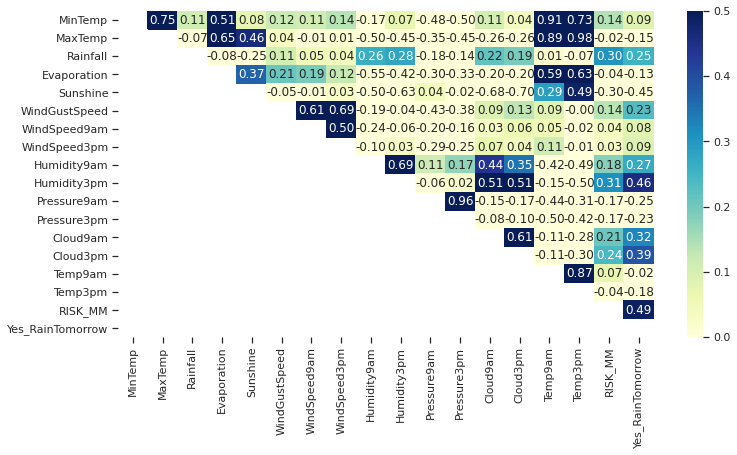

In [0]:
mask = np.zeros_like(data[corr_cols_1].corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data[corr_cols_1].corr(),vmin=0, vmax=0.5, cmap='YlGnBu', annot=True, mask=mask, fmt='.2f')

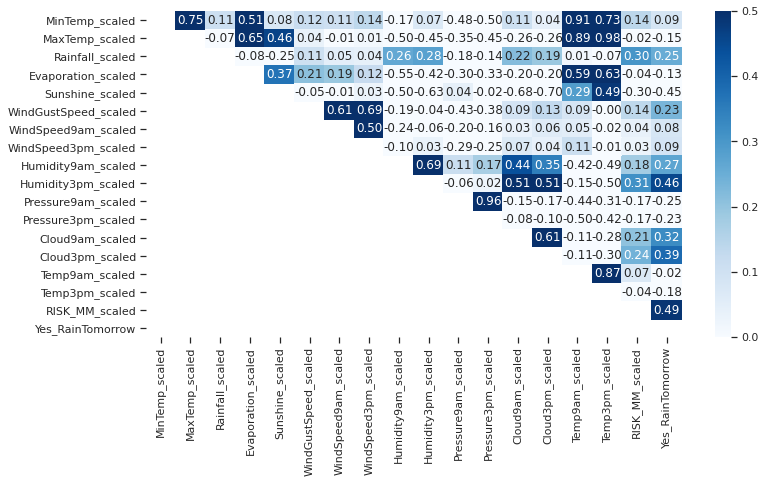

In [0]:
mask = np.zeros_like(data[corr_cols_2].corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data[corr_cols_2].corr(),vmin=0, vmax=0.5, cmap='Blues', annot=True, mask=mask, fmt='.2f')

#<font color='Teal'>Выбор метрик для последующей оценки качества моделей</font>

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

#<font color='Teal'>Формирование обучающей и тестовой выборок на основе исходного набора данных.</font>

In [0]:
data.head

<bound method NDFrame.head of         MinTemp  MaxTemp  ...  Temp3pm_scaled  RISK_MM_scaled
5939       17.9     35.2  ...        0.700472             0.0
5940       18.4     28.9  ...        0.549528             0.0
5942       19.4     37.6  ...        0.735849             0.0
5943       21.9     38.4  ...        0.752358             0.0
5944       24.2     41.0  ...        0.799528             0.0
...         ...      ...  ...             ...             ...
139106     19.3     33.4  ...        0.674528             0.0
139107     21.2     32.6  ...        0.667453             0.0
139108     20.7     32.8  ...        0.669811             0.0
139109     19.5     31.8  ...        0.601415             0.0
139110     20.2     31.7  ...        0.643868             0.0

[56419 rows x 38 columns]>

In [0]:
X = data.drop(corr_cols_1, axis=1)
data=data.drop(['No_RainTomorrow', 'Yes', 'No'], axis=1)
X=data.drop(['Yes_RainTomorrow'], axis=1)
Y = data['Yes_RainTomorrow']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 0)


In [0]:
print(y_train.shape,y_test.shape,X_train.shape,X_test.shape)

(42314,) (14105,) (42314, 34) (14105, 34)


#<font color='Teal'>Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.</font>

In [0]:
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [0]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [0]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('-----------------------------------------------------------')
    print(model)
    print('precision={}, recall={}, f1={}, roc_auc={}'.format(round(precision,3), round(recall,3), round(f1, 3), round(roc_auc, 3)))
    print('-----------------------------------------------------------')
    draw_roc_curve(y_test.values, Y_pred)
    
    plot_confusion_matrix(model, X_test, y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.YlGnBu, normalize='true')
    plt.show()

In [0]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='Aquamarine',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
precision=0.974, recall=0.926, f1=0.949, roc_auc=0.959
-----------------------------------------------------------


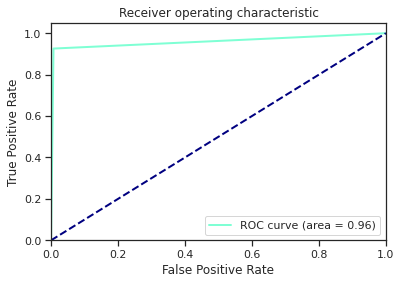

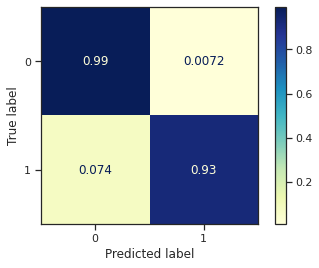

-----------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
precision=0.856, recall=0.63, f1=0.726, roc_auc=0.8
-----------------------------------------------------------


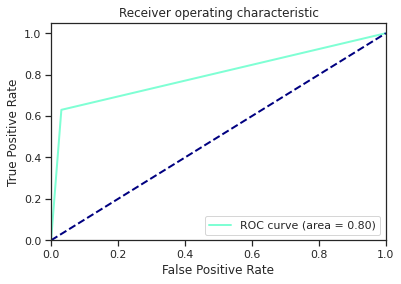

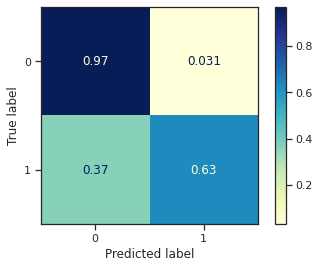

-----------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
precision=0.982, recall=0.368, f1=0.536, roc_auc=0.683
-----------------------------------------------------------


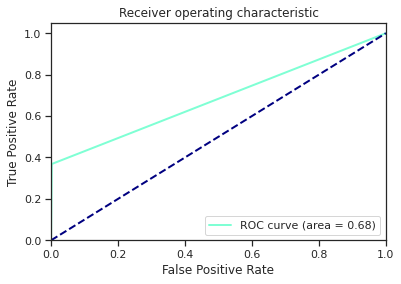

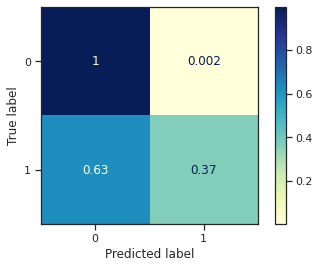

-----------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
precision=1.0, recall=1.0, f1=1.0, roc_auc=1.0
-----------------------------------------------------------


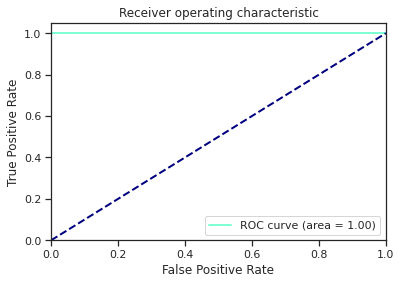

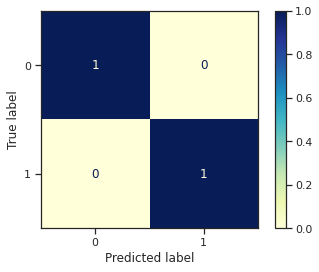

-----------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
precision=1.0, recall=1.0, f1=1.0, roc_auc=1.0
-----------------------------------------------------------


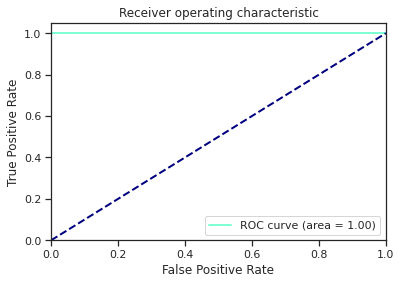

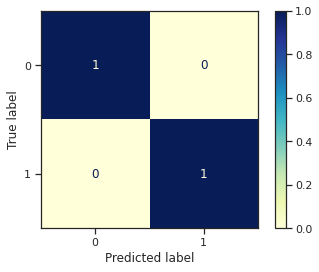

-----------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
precision=1.0, recall=1.0, f1=1.0, roc_auc=1.0
-----------------------------------------------------------


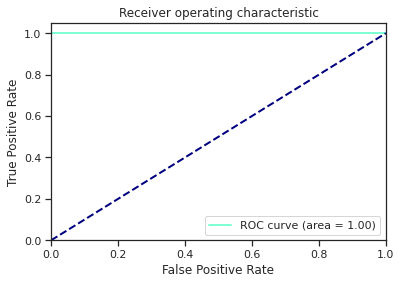

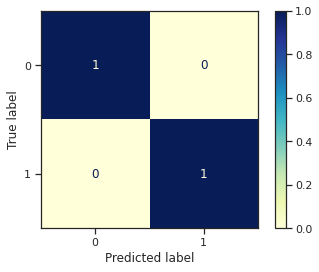

In [0]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

#<font color='Teal'>Подбор гиперпараметров для выбранных моделей. C использованием кросс-валидации</font>

In [0]:
n_range = np.array(range(1,200,20))
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])}]

In [0]:
%%time
clf_gs = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

CPU times: user 2min 55s, sys: 366 ms, total: 2min 55s
Wall time: 2min 55s


In [0]:
# Лучшая модель
clf_gs.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_estimators': 1}

#<font color='Teal'>Градиентный бустинг с подобранным гиперпараметром</font>

In [0]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    
    print('-----------------------------------------------------------')
    print(model)
    print('precision={}, recall={}, f1={}, roc_auc={}'.format(round(precision,3), round(recall,3), round(f1, 3), round(roc_auc, 3)))
    print('-----------------------------------------------------------')

In [0]:
clas_train_model('GB_1', clf_gs.best_estimator_, clasMetricLogger)

-----------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
precision=0.0, recall=0.0, f1=0.0, roc_auc=0.5
-----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#<font color='Teal'> Формирование выводов о качестве построенных моделей на основе выбранных метрик. </font>

In [0]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

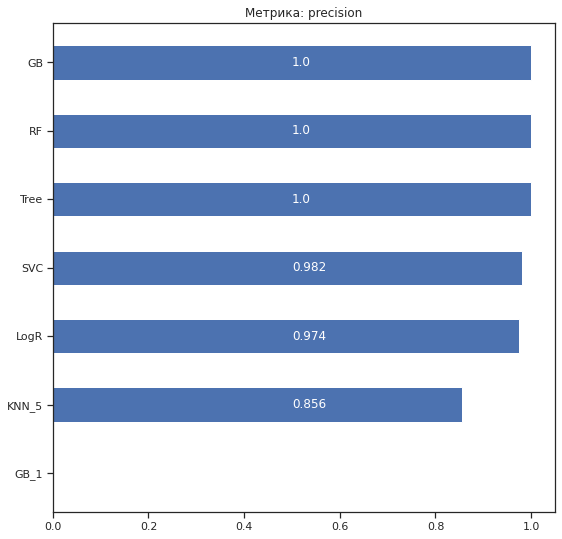

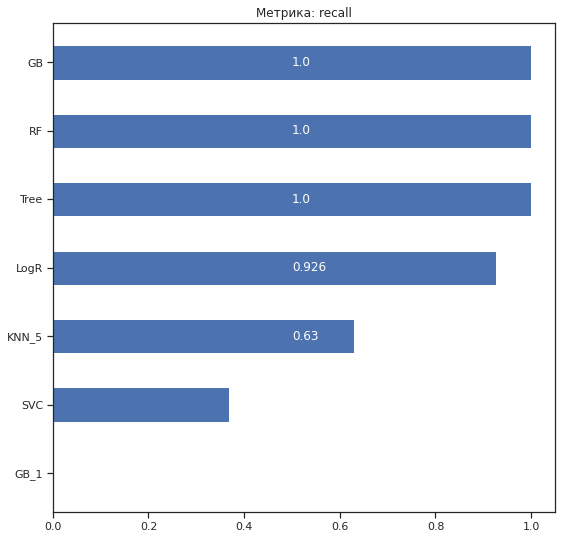

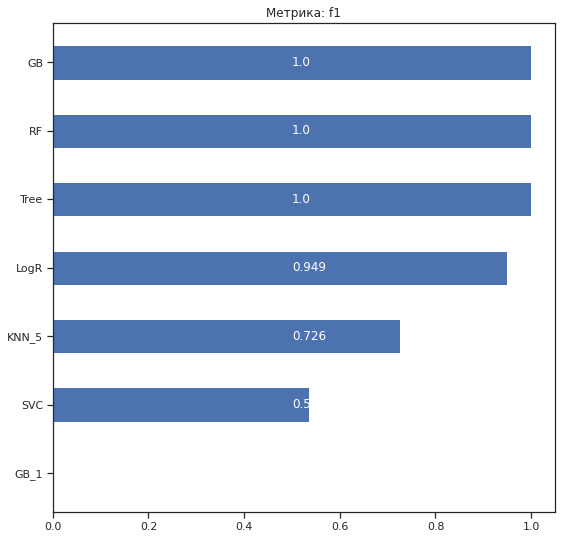

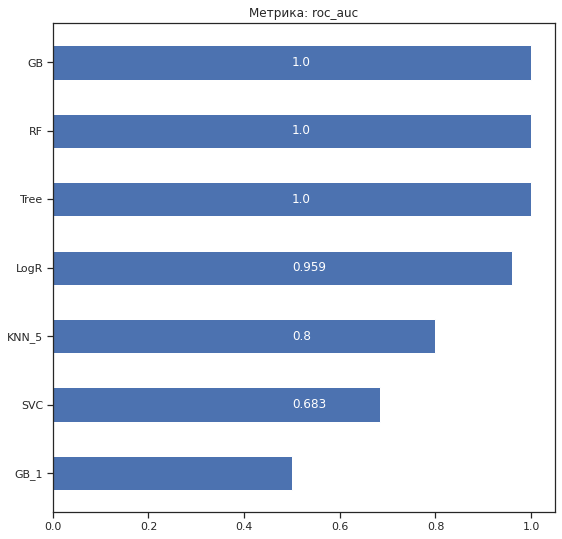

In [0]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(9, 9))